https://www.kaggle.com/taha07/fake-news-classifier-using-lstm

---
# LSTM
---

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [2]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
print(os.listdir('data'))

['submit.csv', 'test.csv', 'train.csv']


In [4]:
df = pd.read_csv('data/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [25]:
df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [5]:
#null값이 비교적 많음을 확인할 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
#결측치 존재하는 행은 모두 제거하기로 함
df = df.dropna()

In [7]:
x = df.drop('label',axis = 1)
y = df['label']

In [8]:
x

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


We are going to use "Title" to classify our News is Fake or Real,So "title" is our Independent variable,whereas our target is to detect our News is Fake or Not,So here our dependent/target variable is label,So Let's get the Independent & Dependent variable


##### LSTM 을 사용한 분류

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### Data Preprocessing

In [10]:
#결측치 지웠으므로 reset index 시켜줘야함

messages = x.copy()
messages.reset_index(inplace = True)
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [12]:
#불용어 다운로드
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user654\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from tqdm.notebook import tqdm

ps = PorterStemmer() #어간 추출
corpus = []

for i in tqdm(range(0, len(messages))):
    result = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    result = result.lower()
    result = result.split()
    
    result = [ps.stem(word) for word in result if not word in stopwords.words("english")]
    result = " ".join(result)
    corpus.append(result)

In [61]:
list(messages.loc[31:32, 'title'].values)

['Re: Why We Are Still In ‘The Danger Zone’ Until January 20th, 2017',
 'Open Thread (NOT U.S. Election) 2016-39']

In [65]:
corpus[31:39]

['still danger zone januari th',
 'open thread u elect',
 'democrat gutierrez blame chicago gun violenc nra breitbart',
 'avoid peanut avoid allergi bad strategi new york time',
 'mri show detail imag week unborn babi breitbart',
 'best kind milk dairi',
 'ryan locht drop speedo usa retail new york time',
 'conserv urg session clean obama civil right divis breitbart']

#####  One Hot representation

In [27]:
#Vocab Size
voc_size = 5000

onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr[30:45]

[[2959, 3777, 1891, 3692, 806, 619, 4966, 504, 4637],
 [290, 1412, 4613, 3667, 741],
 [2802, 3923, 4201, 2647],
 [4545, 4919, 4500, 974, 667, 3115, 3347, 1969],
 [412, 4365, 412, 680, 730, 2861, 4966, 504, 4637],
 [2078, 129, 3749, 369, 3115, 2013, 3790, 1969],
 [2266, 876, 838, 1182],
 [1112, 1155, 977, 4650, 4514, 3213, 4966, 504, 4637],
 [33, 4249, 4264, 1537, 1712, 3624, 4242, 2715, 1969],
 [4410, 3122, 4617, 4210, 1223, 4026, 377, 4966, 504, 4637],
 [126, 156, 3367, 1516, 4276, 11, 3079, 1072, 239],
 [2288, 4977, 4853, 1007, 4260, 4966, 3281, 4966, 504, 4637],
 [5, 477, 234, 3374, 536, 3022, 4491, 786, 724, 187, 1260, 1969],
 [3233, 920, 4177],
 [577, 2246, 98, 472, 596, 1433, 1293, 2795, 973, 1969]]

In [16]:
sent_length = 20
embeded_docs = pad_sequences(onehot_repr , padding = 'pre', maxlen = sent_length)
embeded_docs[:30]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3289,
         218, 3964, 4811, 3642, 2308,  863, 1749, 3573, 2283],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 1804, 4398, 2469, 3278,   93, 1808, 2882],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  399, 2914, 2813, 3520],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2000, 4735, 2279, 2169, 3682, 3539],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1150,
          93,  622, 3397, 2938, 1837,   93,  695, 1672, 4242],
       [   0,    0,    0,    0,    0,   11, 3002, 1973, 3166, 4196, 3492,
        1351, 4991, 2376, 2243, 2090, 2623, 1237, 2936, 2882],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4598, 1880,
        1989, 1125, 1374, 4266, 1302, 1300, 3377, 2800, 2686],
       [   0,    0,    0,    0,    0,    

In [30]:
embeded_docs[30:40]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        2959, 3777, 1891, 3692,  806,  619, 4966,  504, 4637],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  290, 1412, 4613, 3667,  741],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2802, 3923, 4201, 2647],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 4545, 4919, 4500,  974,  667, 3115, 3347, 1969],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         412, 4365,  412,  680,  730, 2861, 4966,  504, 4637],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 2078,  129, 3749,  369, 3115, 2013, 3790, 1969],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2266,  876,  838, 1182],
       [   0,    0,    0,    0,    0,    

In [33]:
sent_length

20

##### Create Model

In [17]:
embedding_vector_features = 40
voc_size = 40

model = Sequential()

model.add(Embedding(voc_size , embedding_vector_features, input_length = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



print(voc_size , embedding_vector_features)

5000 40


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [19]:
x_final = np.array(embeded_docs)
y_final = np.array(y)

In [20]:
history = model.fit(x_final,y_final,validation_split = 0.3,batch_size=64,epochs=10)

Train on 12799 samples, validate on 5486 samples
Epoch 1/10
12799/12799 [==============================] - 4s 291us/sample - loss: 0.3371 - accuracy: 0.8431 - val_loss: 0.1936 - val_accuracy: 0.9147
Epoch 2/10
12799/12799 [==============================] - 1s 91us/sample - loss: 0.1540 - accuracy: 0.9405 - val_loss: 0.1937 - val_accuracy: 0.9198
Epoch 3/10
12799/12799 [==============================] - 1s 90us/sample - loss: 0.1134 - accuracy: 0.9565 - val_loss: 0.1999 - val_accuracy: 0.9151
Epoch 4/10
12799/12799 [==============================] - 1s 92us/sample - loss: 0.0892 - accuracy: 0.9687 - val_loss: 0.2315 - val_accuracy: 0.9151
Epoch 5/10
12799/12799 [==============================] - 1s 95us/sample - loss: 0.0694 - accuracy: 0.9760 - val_loss: 0.2291 - val_accuracy: 0.9092
Epoch 6/10
12799/12799 [==============================] - 1s 91us/sample - loss: 0.0557 - accuracy: 0.9812 - val_loss: 0.2651 - val_accuracy: 0.9163
Epoch 7/10
12799/12799 [==============================] 

In [36]:
x_final.shape

(18285, 20)

In [21]:
x_final.shape

(18285, 20)

In [22]:
y_final.shape

(18285,)

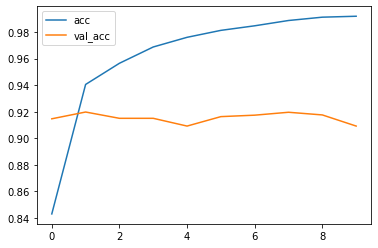

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()